# 1개의 열만 고정하고 나머지 열을 행으로 바꾸기

데이터프레임의 열은 파이썬의 변수와 비슷한 역할을 함. 

데이터프레임의 열 자테가 어떠한 값을 의미하는 경우 열이넓게 늘어선 형태가 됨.  
이것을 넓은 데이터 라고함.  

melt 메서드  
판다스는 데이터프레임을 깔끔한 데이터로 정리하는데 유용한 melt 메서드를 제공함.  
melt 메서드는 지정한 열의 데이터를 모두 행으로 정리해줌.  

|메서드 인자|설명|  
|------|:------:|  
|id_vars|위치를 그대로 유지할 열의 이름을 지정합니다.|
|value_vars|행으로 위치를 변경할 열의 이름을 지정합니다.|
|var_name|value_vars로 위치를 변경한 열의 이름을 지정합니다.|
|value_name|var_name으로 위치를 변경한 열의 데이터를 저장한 열의 이름을 지정합니다.|

Melt 로 데이터프레임을 Reshaping 하는 방법에 대한 자세한 내용, 그림으로 보면 이해하기 쉬움  
[판다스 공식문서 melt](https://pandas.pydata.org/docs/user_guide/reshaping.html)
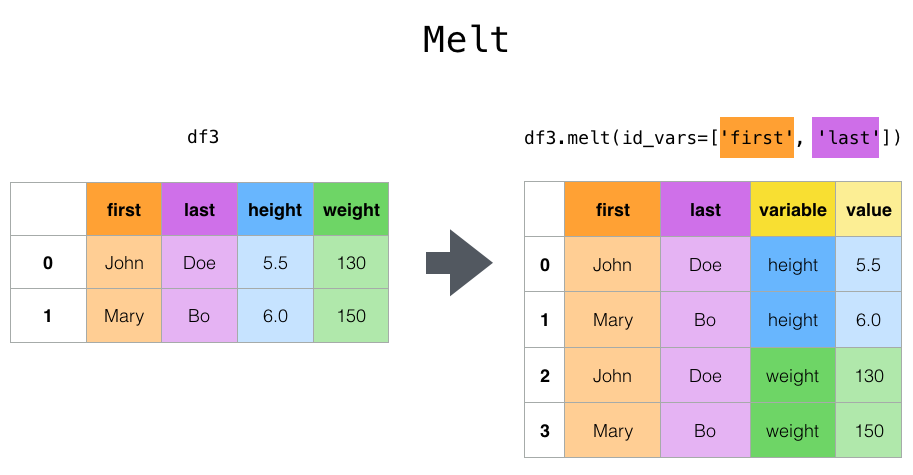

Pew Research Center 에서 조사한 '미국의 소득과 종교'라는 데이터셋을 사용

In [3]:
import pandas as pd

In [2]:
pew = pd.read_csv('data/pew.csv')
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


소득정보가 열로써 구성이 되어있음  
소득정보열을 행으로 구성하고 싶을때 melt 메서드를 사용하게 됨.

In [8]:
# melt 메서드로 religion 열만 고정시키고, 나머지 열을 row로 melt 시킴
pew_long = pd.melt(pew, id_vars='religion')

# religion 이 Agnostic 인 행들만 추출
pew_long[pew_long['religion']== 'Agnostic']

,religion,variable,value
0,Agnostic,<$10k,27
18,Agnostic,$10-20k,34
36,Agnostic,$20-30k,60
54,Agnostic,$30-40k,81
72,Agnostic,$40-50k,76
90,Agnostic,$50-75k,137
108,Agnostic,$75-100k,122
126,Agnostic,$100-150k,109
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96


소득 정보에 대한 열들(<$10k, $10-20k ...) 이 variable 열로 정리되고, 소득정보 열의 행 데이터도 value 열로 정리됨  
== religion 열을 고정하여 피벗했다 라고 표현함 

In [10]:
# variable, values의 열이름 바꾸어서 
pew_long = pd.melt(pew, id_vars='religion', var_name='income', value_name='count')

# religion 이 Agnostic 인 행들만 추출
pew_long[pew_long['religion']== 'Agnostic']

,religion,income,count
0,Agnostic,<$10k,27
18,Agnostic,$10-20k,34
36,Agnostic,$20-30k,60
54,Agnostic,$30-40k,81
72,Agnostic,$40-50k,76
90,Agnostic,$50-75k,137
108,Agnostic,$75-100k,122
126,Agnostic,$100-150k,109
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96


# 2개 이상의 열을 고정하고 나머지 열을 행으로 바꾸기

빌보드 차트 데이터를 사용하여 실습 진행.  
2개 이상의 열을 고정하고 나머지 열을 행으로 바꾸는 방법

In [11]:
# 빌보드 차트 데이터 살펴보기
billborad = pd.read_csv('data/billboard.csv')
billborad.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9,wk10,wk11,wk12,wk13,wk14,wk15,wk16,wk17,wk18,wk19,wk20,wk21,wk22,wk23,wk24,wk25,wk26,wk27,wk28,wk29,wk30,wk31,wk32,wk33,wk34,...,wk38,wk39,wk40,wk41,wk42,wk43,wk44,wk45,wk46,wk47,wk48,wk49,wk50,wk51,wk52,wk53,wk54,wk55,wk56,wk57,wk58,wk59,wk60,wk61,wk62,wk63,wk64,wk65,wk66,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,94.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,57.0,54.0,53.0,51.0,51.0,51.0,51.0,47.0,44.0,38.0,28.0,22.0,18.0,18.0,14.0,12.0,7.0,6.0,6.0,6.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,...,9.0,9.0,15.0,14.0,13.0,14.0,16.0,17.0,21.0,22.0,24.0,28.0,33.0,42.0,42.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,65.0,55.0,59.0,62.0,61.0,61.0,59.0,61.0,66.0,72.0,76.0,75.0,67.0,73.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,31.0,36.0,49.0,53.0,57.0,64.0,70.0,75.0,76.0,78.0,85.0,92.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


데이터를 살펴보면 주차별 정보가 열로 입력되어있는 것을 볼 수 있음.  
year, artist, track, time, date.entered 열만 고정 시키고 wk1, wk2, ... wk15 까지의 열을 피벗함  

In [13]:
billborad_long = pd.melt(billborad, id_vars=['year', 'artist', 'track', 'time', 'date.entered'], var_name='week', value_name='rating')
billborad_long[billborad_long['artist'] == '2 Pac']

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
317,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0
634,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk3,72.0
951,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0
1268,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk5,87.0
...,...,...,...,...,...,...,...
22507,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk72,NaN
22824,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk73,NaN
23141,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk74,NaN
23458,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk75,NaN


# ebola 데이터 집합 살펴보기
어떠한 열은 한개 이상의 의미를 가지고 있는 열이 있을 수 있음.  
ebola 데이터 집합의 열중 하나인 Deaths_Guinea 는 '사망자 수'와 '나라 이름'을 합쳐 만든 열

In [16]:
# ebola 데이터 살펴보기
ebola = pd.read_csv('data/country_timeseries.csv')
print(ebola.columns)
ebola.iloc[:5, [0, 1, 2, 3, 10, 11]]

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')


,Date,Day,Cases_Guinea,Cases_Liberia,Deaths_Guinea,Deaths_Liberia
0,1/5/2015,289,2776.0,NaN,1786.0,NaN
1,1/4/2015,288,2775.0,NaN,1781.0,NaN
2,1/3/2015,287,2769.0,8166.0,1767.0,3496.0
3,1/2/2015,286,NaN,8157.0,NaN,3496.0
4,12/31/2014,284,2730.0,8115.0,1739.0,3471.0


In [18]:
ebola_long = pd.melt(ebola, id_vars=['Date', 'Day'])
ebola_long.head()

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


# 열 이름 나누고 데이터 프레임에 추가하기

Cases_Guinea 와 같이 2개 이상의 의미를 가지고 있는 열 이름은 _ 을 기준으로 Cases, Guinea 와 같은 방법으로 분리가 가능  
이때 열 이름을 분리하려면 split 메서드를 사용하면 됨.  
split 메서드는 기본적으로 공백을 기분으로 문자열을 나누지만, 인자값으로 문자열을 넣어주면 해당 문자열을 기준으로 나눔  

1. split 메서드로 문자열을 나누고,  
2. 나눈 문자열을 변수에 담아  
3. 데이터프레임의 새로운 열로 추가

1. split 메서드로 문자열을 나눔

In [19]:
# _ 를 기준으로 문자열을 나눔
var_split = ebola_long.variable.str.split('_')
var_split

0       [Cases, Guinea]
1       [Cases, Guinea]
2       [Cases, Guinea]
3       [Cases, Guinea]
4       [Cases, Guinea]
             ...       
1947     [Deaths, Mali]
1948     [Deaths, Mali]
1949     [Deaths, Mali]
1950     [Deaths, Mali]
1951     [Deaths, Mali]
Name: variable, Length: 1952, dtype: object

In [20]:
# var_split 의 자료형
print(type(var_split))

# var_split 요소의 자료형
print(type(var_split[0]))

<class 'pandas.core.series.Series'>
<class 'list'>


2. 나눈 문자열에 접근하여 변수에 저장  
var_split 의 첫번째 요소는 Cases 발병 & Deaths 죽음과 같은 상태를 의미하고  
var_split 의 두번째 요소는 Country 나라 이름을 의미함  

In [28]:
# get 메서드로 요소에 접근
status_values = var_split.str.get(0)  # 발병과 죽음
country_values = var_split.str.get(1)  # 나라
print(status_values[0])
print(country_values[0])

Cases
Guinea


3. 분리한 문자열을 status, country 라는 열이름으로 데이터프레임의 열로 추가함  

In [29]:
ebola_long['status'] = status_values
ebola_long['country'] = country_values
ebola_long.head()

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


# concat 메서드를 응용하여 데이터프레임에 열 추가하기
concat 메서드를 활용하면 split 메서드로 분리한 데이터를 바로 데이터프레임에 추가할 수도 있음.  

**split(expand=)**  
expand : bool, default False  
    Expand the split strings into separate columns.  

    * If ``True``, return DataFrame/MultiIndex expanding dimensionality.  
    * If ``False``, return Series/Index, containing lists of strings.  

In [40]:
# split 메서드로 '_' 기준으로 나누고, expand 인자값으로 True 로 주어 데이터프레임 반환
variable_split = ebola_long.variable.str.split('_', expand=True)
variable_split.head()

,0,1
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea


In [41]:
# 컬럼명 변경
variable_split.columns = ['status_2', 'country_2']
variable_split.head()

,status_2,country_2
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea


In [42]:
ebola_parsed = pd.concat([ebola_long, variable_split], axis=1)
ebola_parsed.head()

,Date,Day,variable,value,status,country,status_2,country_2
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea,Cases,Guinea


# 기상 데이터의 여러 열을 하나로 정리하기

In [43]:
weather = pd.read_csv('data/weather.csv')
weather.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,NaN,NaN,NaN,34.5,NaN,NaN,NaN,NaN,NaN,31.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


날짜에 대한 정보가 열로써 늘어져 있음 보기 불편하므로, 날짜 열을 행 데이터로 melt

In [45]:
# melt 메서드로 날짜정보 녹여내기
weather_melt = pd.melt(weather, id_vars=['id', 'year', 'month', 'element'], var_name='day', value_name='temp')
weather_melt.head()

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN


pivot_table 메서드 : 행과 열의 위치를 바꿔 정리해줌.  

|메서드 인자|설명|
|:-----:|:-----:|
|index|위치를 그대로 유지할 열 이름 지정|
|columns|피벗할 열이름 지정|
|values|새로운 열의 데이터가 될 열의 이름을 지정|

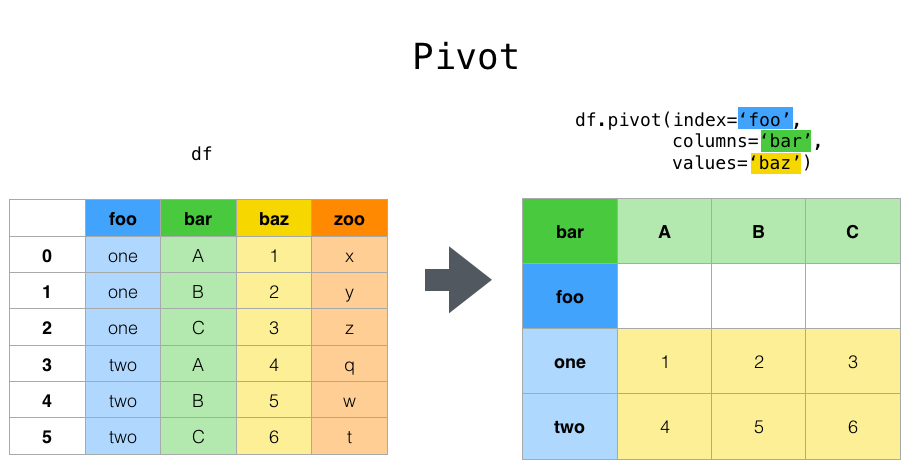
[판다스 공식문서 pivot_table](https://pandas.pydata.org/docs/user_guide/reshaping.html#pivot-tables)

In [48]:
weather_pivot = weather_melt.pivot_table(
    index=['id', 'year', 'month', 'day'], 
    columns='element',
    values='temp'
)

weather_pivot

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2
             6     d17  28.0  17.5
                   d29  30.1  18.0
             7     d3   28.6  17.5
                   d14  29.9  16.5
             8     d23  26.4  15.0
                   d5   29.6  15.8
                   d29  28.0  15.3
                   d13  29.8  16.5
                   d25  29.7  15.6
                   d31  25.4  15.4
                   d8   29.0  17.3
             10    d5   27.0  14.0
                   d14  29.5  13.0
                   d15  28.7  10.5
                   d28  31.2  15.0
                   d7   28.1  12.9
             11    d2   31.3  16.3
                   d5   26.3   7.9
                   d27  27.7  14.2
                   d26  28.1  12.1
                   d4   27.2  12.0
             12    d1   29.9  13.8
                   d6   27.8  10.5

reset_index 메서드는 인덱스를 초기화 시켜주는 메서드  
지금처럼 멀티인덱스의 경우도 적용됨. 멀티인덱스와 관련한 다양한 인잣값들은 공식문서 참조  
[판다스 공식문서 reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)

In [50]:
# 데이터프레임의 인덱스를 reset_index 로 새로 지정
weather_pivot_flat = weather_pivot.reset_index()
weather_pivot_flat.head()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4


# 빌보드 차트의 중복 데이터 처리하기

In [52]:
billborad = pd.read_csv('data/billboard.csv')
billborad.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9,wk10,wk11,wk12,wk13,wk14,wk15,wk16,wk17,wk18,wk19,wk20,wk21,wk22,wk23,wk24,wk25,wk26,wk27,wk28,wk29,wk30,wk31,wk32,wk33,wk34,...,wk38,wk39,wk40,wk41,wk42,wk43,wk44,wk45,wk46,wk47,wk48,wk49,wk50,wk51,wk52,wk53,wk54,wk55,wk56,wk57,wk58,wk59,wk60,wk61,wk62,wk63,wk64,wk65,wk66,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,94.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,57.0,54.0,53.0,51.0,51.0,51.0,51.0,47.0,44.0,38.0,28.0,22.0,18.0,18.0,14.0,12.0,7.0,6.0,6.0,6.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,...,9.0,9.0,15.0,14.0,13.0,14.0,16.0,17.0,21.0,22.0,24.0,28.0,33.0,42.0,42.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,65.0,55.0,59.0,62.0,61.0,61.0,59.0,61.0,66.0,72.0,76.0,75.0,67.0,73.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,31.0,36.0,49.0,53.0,57.0,64.0,70.0,75.0,76.0,78.0,85.0,92.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
billborad_long = pd.melt(billborad, id_vars=['year', 'artist', 'track', 'time', 'date.entered'], var_name='week', value_name='rating')
print(billborad_long.shape)
billborad_long.head()

(24092, 7)


,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0


melt 시킨 데이터프레임에서 artist가 2pac인 행들을 추출해보면  
year, artist, track, time, date.entered 열들이 반복되어서 출력되고 있는 것을 확인할 수 있음  

* 일자별 빌보드차드의 rating 변화를 보기 위한 데이터이므로 column 에 day 정보를 둔것이겠지만, melt를 하면성 day 정보를 행으로 녹이는 과정에서 위의 컬럼들이 계속 반복되는 현상이 나타남  
* 행 데이터들은 독립적이나, 위의 컬럼들의 내용이 계속 중복되어 있음  

year, artist, track, time 과 같은 곡에 대한 정보를 따로 관리하여 데이터의 일관성을 유지

In [56]:
billborad_long[billborad_long['artist'] == '2 Pac'].head()

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
317,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0
634,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk3,72.0
951,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0
1268,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk5,87.0


In [58]:
# 열들을 따로 모아 새로운 데이터프레임에 저장
billborad_songs = billborad_long[['year', 'artist', 'track', 'time']]
print(billborad_songs.shape)
billborad_songs.head()

(24092, 4)


,year,artist,track,time
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22
1,2000,2Ge+her,The Hardest Part Of ...,3:15
2,2000,3 Doors Down,Kryptonite,3:53
3,2000,3 Doors Down,Loser,4:24
4,2000,504 Boyz,Wobble Wobble,3:35


In [60]:
# drop_duplicates 메서드로 데이터프레임의 중복 데이터를 제거
billborad_songs = billborad_songs.drop_duplicates()
print(billborad_songs.shape)

(317, 4)


이렇게 만든 billborad_songs 는 곡에 대한 정보를 담고 있는 테이블이 됨  
id 컬럼을 추가하여 데이터를 조회하거나 구분을 쉽게 함  

In [62]:
billborad_songs['id'] = range(len(billborad_songs))
billborad_songs.head(10)

,year,artist,track,time,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,1
2,2000,3 Doors Down,Kryptonite,3:53,2
3,2000,3 Doors Down,Loser,4:24,3
4,2000,504 Boyz,Wobble Wobble,3:35,4
5,2000,98^0,Give Me Just One Nig...,3:24,5
6,2000,A*Teens,Dancing Queen,3:44,6
7,2000,Aaliyah,I Don't Wanna,4:15,7
8,2000,Aaliyah,Try Again,4:03,8
9,2000,"Adams, Yolanda",Open My Heart,5:30,9


merge 메서드를 활용해 노래정보과 주간 순위 데이터를 합침  

In [69]:
billborad_ratings = billborad_long.merge(billborad_songs, on=['year', 'artist', 'track', 'time'])
billborad_ratings.head()

,year,artist,track,time,date.entered,week,rating,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0,0
1,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk2,82.0,0
2,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk3,72.0,0
3,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk4,77.0,0
4,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk5,87.0,0


In [70]:
# 노래주간 순위와 곡 정보를 나타내는 id 
billborad_ratings = billborad_ratings.drop(columns=['year', 'artist', 'track', 'time'])
billborad_ratings.head()

,date.entered,week,rating,id
0,2000-02-26,wk1,87.0,0
1,2000-02-26,wk2,82.0,0
2,2000-02-26,wk3,72.0,0
3,2000-02-26,wk4,77.0,0
4,2000-02-26,wk5,87.0,0


# 뉴욕 택시 데이터 준비
데이터는 필요와 목저에 따라 나누어 저장, 저장하면 용량이 작아져 데이터를 저장하거나, 공유할때 유용함  
여러개로 나누어진 데이터를 불러오는 것과 그러한 데이터를 다루는 방법  

뉴욕 택시 데이터를 사용함  
13억대의 뉴욕 택시에 대한 정보를 가지고 있음.  총 140개의 파일로 이루어진 데이터 세트, 이중에서 5개의 데이터를 사용  

사용할 데이터는 url을 통해 직접 다운받아 사용함.  
raw_data_urls.txt 파일을 보게되면 다음과 같이 불러올 csv 파일의 url 주소가 적혀있음  
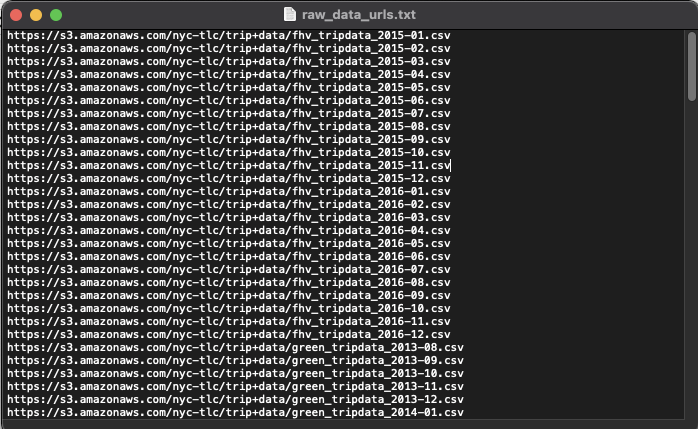

### urllib.request.urlretrieve
위 메서드를 사용하여 url 주소에 있는 자료를 현재 로컬 디렉토리에 다운로드 받음, 자세한 사용법은 공식문서 참조  

The following functions and classes are ported from the Python 2 module urllib (as opposed to urllib2). They might become deprecated at some point in the future.  

**urllib.request.urlretrieve(url, filename=None, reporthook=None, data=None)**  

Copy a network object denoted by a URL to a local file. If the URL points to a local file, the object will not be copied unless filename is supplied. Return a tuple (filename, headers) where filename is the local file name under which the object can be found, and headers is whatever the info() method of the object returned by urlopen() returned (for a remote object). Exceptions are the same as for urlopen().  
[파이썬 공식문서 urlretrieve](https://docs.python.org/3/library/urllib.request.html)


In [73]:
import os 
import urllib.request 

with open('data/raw_data_urls.txt', 'r') as data_urls:  # raw_data_urls.txt 파일을 읽기모드로 열기, data_urls라는 변수에 할당
    for line, url in enumerate(data_urls):  # data_urls을 enumerate 함수로 index 값(=line의 순서)과 url(https://s3.amazonaws.com~)한 줄씩 반복문을 통해 불러옴
        if line == 5:  # 만약 index 의 값이 4번째까지 불러왔다면, 
            break  # index의 값이 5가 될때 반복문을 break 하라 == 5개의 line 을 반복한 것(0, 1, 2, 3, 4)
        fn = url.split('/')[-1].strip()  # 파일명만 추출, 예시) fn = fhv_tripdata_2015-01.csv 
        fq = os.path.join('', 'data/', fn) # 파일명과 저장할 디렉토리를 join, 예시) fq = data/fhv_tripdata_2015-01.csv
        print(url)
        print(fq)
        urllib.request.urlretrieve(url, fq)

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-01.csv

data/fhv_tripdata_2015-01.csv
https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-02.csv

data/fhv_tripdata_2015-02.csv
https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-03.csv

data/fhv_tripdata_2015-03.csv
https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-04.csv

data/fhv_tripdata_2015-04.csv
https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-05.csv

data/fhv_tripdata_2015-05.csv


내려받은 데이터는 data 폴더에 'fhv_tripdata_YYYY-MM.csv'이라는 형식으로 저장됨  
glob 라이브러리에 포함된 glob 메서드는 특정한 패턴의 이름을 가진 파일을 한번에 읽어 들일 수 있슴  

In [82]:
import glob
nyc_taxi_data = glob.glob('data/fhv_*')
nyc_taxi_data.sort()
print(nyc_taxi_data)

['data/fhv_tripdata_2015-01.csv', 'data/fhv_tripdata_2015-02.csv', 'data/fhv_tripdata_2015-03.csv', 'data/fhv_tripdata_2015-04.csv', 'data/fhv_tripdata_2015-05.csv']


각각의 파일을 데이터 프레임으로 저장

In [85]:
# 동적변수를 활용한 데이터프레임 생성
for i in range(len(nyc_taxi_data)):
    globals()[f'taxi{i+1}'] = pd.read_csv(nyc_taxi_data[i])
    print(f'taxi{i+1}', ' 불러오기 완료')

taxi1  불러오기 완료
taxi2  불러오기 완료
taxi3  불러오기 완료
taxi4  불러오기 완료
taxi5  불러오기 완료


In [86]:
print(taxi1.head(2))
print(taxi2.head(2))
print(taxi3.head(2))
print(taxi4.head(2))
print(taxi5.head(2))

  Dispatching_base_num          Pickup_date  locationID
0               B00013  2015-01-01 00:30:00         NaN
1               B00013  2015-01-01 01:22:00         NaN
  Dispatching_base_num          Pickup_date  locationID
0               B00013  2015-02-01 00:00:00         NaN
1               B00013  2015-02-01 00:01:00         NaN
  Dispatching_base_num          Pickup_date  locationID
0               B00029  2015-03-01 00:02:00       213.0
1               B00029  2015-03-01 00:03:00        51.0
  Dispatching_base_num          Pickup_date  locationID
0               B00001  2015-04-01 04:30:00         NaN
1               B00001  2015-04-01 06:00:00         NaN
  Dispatching_base_num          Pickup_date  locationID
0               B00001  2015-05-01 04:30:00         NaN
1               B00001  2015-05-01 05:00:00         NaN


In [87]:
print(taxi1.shape)
print(taxi2.shape)
print(taxi3.shape)
print(taxi4.shape)
print(taxi5.shape)

(2746033, 3)
(3126401, 3)
(3281427, 3)
(3917789, 3)
(4296067, 3)


데이터 처리를 위해 concat 메서드로 각 데이터프레임을 연결

In [89]:
taxi = pd.concat([taxi1, taxi2, taxi3, taxi4, taxi5])
print(taxi.shape)

(17367717, 3)


# 반복문으로 데이터 준비하기
반복문을 응용하면 쉽게 데이터를 불러와서 연결할 수 있음 

In [94]:
list_taxi_df = []

for index, csv_filedir in enumerate(nyc_taxi_data):
    print('불러오는 csv 경로 : ', csv_filedir)
    df = pd.read_csv(csv_filedir)
    list_taxi_df.append(df)
    
    print('현재까지 불러온 df 개수 : ', len(list_taxi_df))
    print('df type 확인 : ', type(list_taxi_df[index]))
    print('df 미리보기 : ', list_taxi_df[index].head())
    print('------------------------------------------')
    
print('데이터 불러오기 완료')
print('------------------------------------------')

taxi_loop_concat = pd.concat(list_taxi_df)
print('데이터 연결 완료')
print('연결된 데이터 shape : ', taxi_loop_concat.shape)

print('------------------------------------------')

print('앞서 불러온 taxi 데이터 프레임과 반복문으로 불러온 taxi_loop_concat 데이터프레임 일치 : ', taxi.equals(taxi_loop_concat))  

불러오는 csv 경로 :  data/fhv_tripdata_2015-01.csv
현재까지 불러온 df 개수 :  1
df type 확인 :  <class 'pandas.core.frame.DataFrame'>
df 미리보기 :    Dispatching_base_num          Pickup_date  locationID
0               B00013  2015-01-01 00:30:00         NaN
1               B00013  2015-01-01 01:22:00         NaN
2               B00013  2015-01-01 01:23:00         NaN
3               B00013  2015-01-01 01:44:00         NaN
4               B00013  2015-01-01 02:00:00         NaN
------------------------------------------
불러오는 csv 경로 :  data/fhv_tripdata_2015-02.csv
현재까지 불러온 df 개수 :  2
df type 확인 :  <class 'pandas.core.frame.DataFrame'>
df 미리보기 :    Dispatching_base_num          Pickup_date  locationID
0               B00013  2015-02-01 00:00:00         NaN
1               B00013  2015-02-01 00:01:00         NaN
2               B00013  2015-02-01 00:21:00         NaN
3               B00013  2015-02-01 01:00:00         NaN
4               B00013  2015-02-01 02:10:00         NaN
-----------------------------